In [1]:
!pip install kaggle

In [2]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Importing Face Mask Dataset

In [3]:
# API to fetch the dataset from Kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

 97% 158M/163M [00:02<00:00, 87.3MB/s]
100% 163M/163M [00:02<00:00, 80.1MB/s]


In [4]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [5]:
!ls

data  face-mask-dataset.zip  kaggle.json  sample_data


**Importing the Dependencies**

In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [7]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_1357.jpg', 'with_mask_419.jpg', 'with_mask_2533.jpg', 'with_mask_1497.jpg', 'with_mask_2083.jpg']
['with_mask_3549.jpg', 'with_mask_552.jpg', 'with_mask_360.jpg', 'with_mask_612.jpg', 'with_mask_3391.jpg']


In [8]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_2150.jpg', 'without_mask_80.jpg', 'without_mask_1100.jpg', 'without_mask_1015.jpg', 'without_mask_1387.jpg']
['without_mask_3466.jpg', 'without_mask_3159.jpg', 'without_mask_188.jpg', 'without_mask_535.jpg', 'without_mask_3420.jpg']


In [9]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


**Creating Labels for the two class of Images**

with mask  -->  1

without mask  -->  0

In [10]:
# create the labels

with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

In [11]:
print(with_mask_labels[0:5])

print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [12]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [13]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


**Displaying the Images**

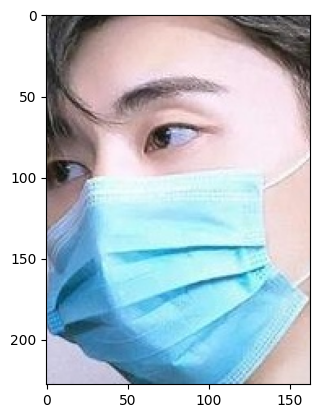

In [14]:
# displaying with mask image
img = mpimg.imread('/content/data/with_mask/with_mask_1545.jpg')
imgplot = plt.imshow(img)
plt.show()

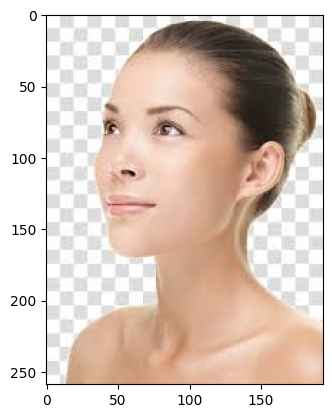

In [15]:
# displaying without mask image
img = mpimg.imread('/content/data/without_mask/without_mask_2925.jpg')
imgplot = plt.imshow(img)
plt.show()

**Image Processing**

1. Resize the Images

2. Convert the images to numpy arrays

In [17]:
# convert images to numpy arrays+

with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

In [18]:
type(data)

list

In [19]:
len(data)

7553

In [20]:
data[0]

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[197, 195, 196],
        [  6,   4,   5],
        [ 13,  11,  12],
        ...,
        [ 44,  26,  27],
        [ 59,  43,  47],
        [ 64,  49,  56]],

       [[197, 195, 196],
        [  4,   2,   3],
        [ 13,  11,  12],
        ...,
        [ 34,  18,  18],
        [ 45,  31,  34],
        [ 64,  52,  58]],

       [[197, 195, 196],
        [  3,   2,   2],
        [ 12,  10,  11],
        ...,
        [ 32,  18,  18],
        [ 29,  18,  20],
        [ 74,  63,  69]]

In [21]:
type(data[0])

numpy.ndarray

In [22]:
data[0].shape

(128, 128, 3)

In [23]:
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [24]:
type(X)

numpy.ndarray

In [25]:
type(Y)

numpy.ndarray

In [26]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [27]:
print(Y)

[1 1 1 ... 0 0 0]


**Train Test Split**

In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [29]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [30]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [31]:
X_train[0]

array([[[247, 250, 253],
        [246, 249, 252],
        [245, 248, 252],
        ...,
        [246, 249, 252],
        [246, 249, 253],
        [246, 249, 254]],

       [[232, 235, 240],
        [232, 235, 240],
        [230, 233, 238],
        ...,
        [231, 234, 239],
        [232, 235, 240],
        [235, 238, 243]],

       [[236, 239, 244],
        [236, 239, 244],
        [234, 237, 242],
        ...,
        [235, 238, 243],
        [235, 238, 243],
        [234, 237, 242]],

       ...,

       [[191, 190, 191],
        [145, 144, 145],
        [178, 176, 177],
        ...,
        [ 47,  40,  48],
        [ 44,  37,  45],
        [ 69,  62,  70]],

       [[164, 161, 162],
        [148, 145, 146],
        [180, 177, 178],
        ...,
        [ 45,  38,  46],
        [ 43,  36,  44],
        [ 68,  61,  69]],

       [[150, 146, 147],
        [152, 148, 149],
        [183, 179, 180],
        ...,
        [ 44,  37,  45],
        [ 43,  36,  44],
        [ 68,  61,  69]]

In [32]:
X_train_scaled[0]

array([[[0.96862745, 0.98039216, 0.99215686],
        [0.96470588, 0.97647059, 0.98823529],
        [0.96078431, 0.97254902, 0.98823529],
        ...,
        [0.96470588, 0.97647059, 0.98823529],
        [0.96470588, 0.97647059, 0.99215686],
        [0.96470588, 0.97647059, 0.99607843]],

       [[0.90980392, 0.92156863, 0.94117647],
        [0.90980392, 0.92156863, 0.94117647],
        [0.90196078, 0.91372549, 0.93333333],
        ...,
        [0.90588235, 0.91764706, 0.9372549 ],
        [0.90980392, 0.92156863, 0.94117647],
        [0.92156863, 0.93333333, 0.95294118]],

       [[0.9254902 , 0.9372549 , 0.95686275],
        [0.9254902 , 0.9372549 , 0.95686275],
        [0.91764706, 0.92941176, 0.94901961],
        ...,
        [0.92156863, 0.93333333, 0.95294118],
        [0.92156863, 0.93333333, 0.95294118],
        [0.91764706, 0.92941176, 0.94901961]],

       ...,

       [[0.74901961, 0.74509804, 0.74901961],
        [0.56862745, 0.56470588, 0.56862745],
        [0.69803922, 0

**Building a Convolutional Neural Networks (CNN)**

In [33]:
import tensorflow as tf
from tensorflow import keras

In [34]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

In [35]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [36]:
# training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 [==============================] - 16s 22ms/step - loss: 0.4843 - acc: 0.7968 - val_loss: 0.3855 - val_acc: 0.8397
Epoch 2/5
170/170 [==============================] - 3s 20ms/step - loss: 0.2792 - acc: 0.8898 - val_loss: 0.2499 - val_acc: 0.8893
Epoch 3/5
170/170 [==============================] - 3s 19ms/step - loss: 0.2311 - acc: 0.9104 - val_loss: 0.2222 - val_acc: 0.9207
Epoch 4/5
170/170 [==============================] - 3s 18ms/step - loss: 0.2070 - acc: 0.9205 - val_loss: 0.2390 - val_acc: 0.9008
Epoch 5/5
170/170 [==============================] - 3s 17ms/step - loss: 0.1815 - acc: 0.9319 - val_loss: 0.1976 - val_acc: 0.9223


**Model Evaluation**

In [37]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 [==============================] - 0s 9ms/step - loss: 0.1877 - acc: 0.9252
Test Accuracy = 0.9252150654792786


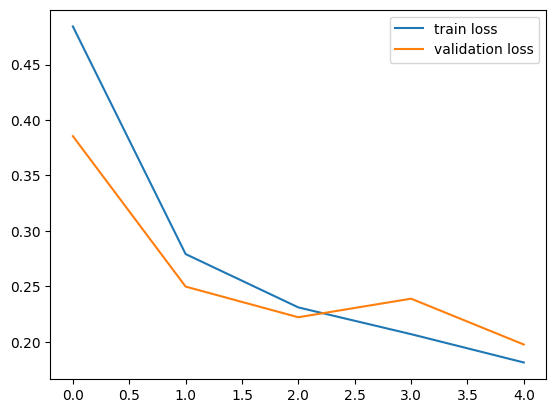

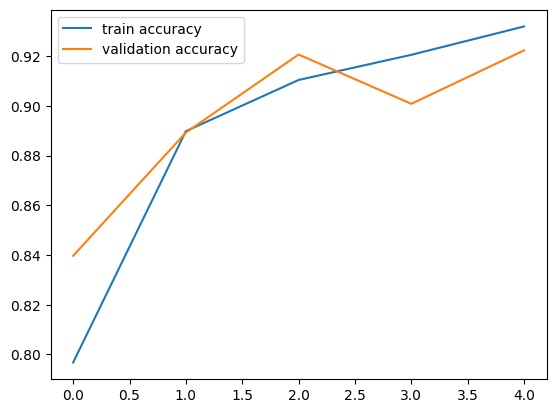

In [38]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

**Predictive System**

Path of the image to be predicted: /content/mask.jpg


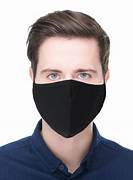

1/1 [==============================] - 0s 254ms/step
[[0.10595632 0.89456254]]
1
The person in the image is wearing a mask


In [40]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')

Path of the image to be predicted: /content/with out maskjpg.jpg


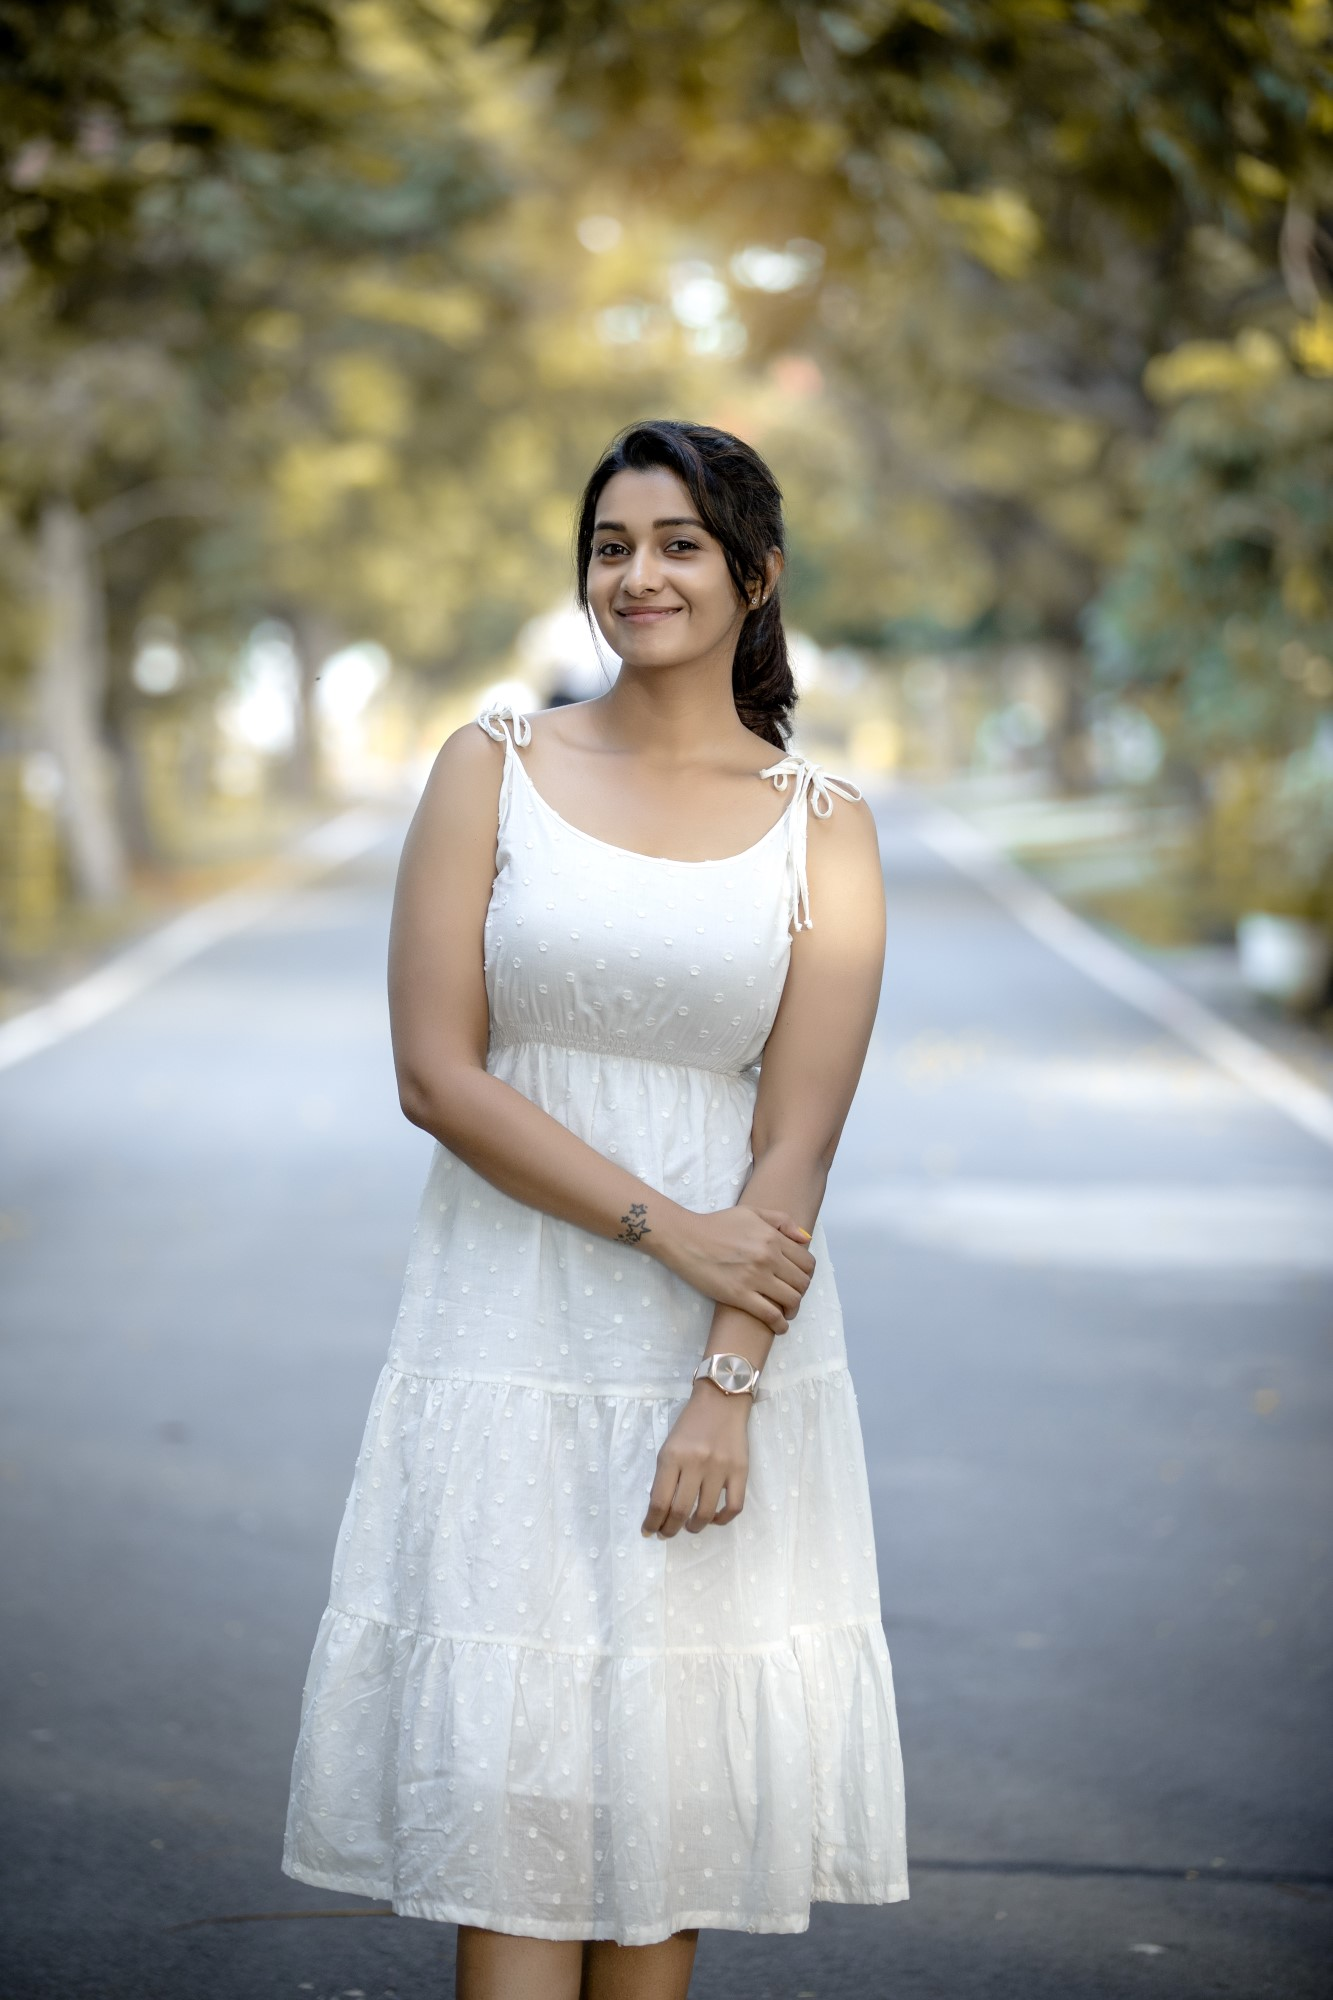

1/1 [==============================] - 0s 31ms/step
[[0.53908694 0.48286372]]
0
The person in the image is not wearing a mask


In [41]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')